# Visualizing Medicaid Spending (2020 Data) 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy 

import seaborn as sns

In [3]:
#read csv file 
spending = pd.read_csv('medicaid.csv')

In [4]:
#visualize the first 5 and last 5 rows 
spending.head().append(spending.tail())

/var/folders/c1/cwj8fw_j3bs0ppnmkfpn4kjw0000gn/T/ipykernel_38830/1570918412.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spending.head().append(spending.tail())


,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2016,Tot_Dsg_Unts_2016,Tot_Clms_2016,Avg_Spnd_Per_Dsg_Unt_Wghtd_2016,Avg_Spnd_Per_Clm_2016,Outlier_Flag_2016,...,Avg_Spnd_Per_Clm_2019,Outlier_Flag_2019,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Tot_Clms_2020,Avg_Spnd_Per_Dsg_Unt_Wghtd_2020,Avg_Spnd_Per_Clm_2020,Outlier_Flag_2020,Chg_Avg_Spnd_Per_Dsg_Unt_19_20,CAGR_Avg_Spnd_Per_Dsg_Unt_16_20
0,8hr Arthritis Pain,Acetaminophen,1,Overall,NaN,NaN,NaN,NaN,NaN,NaN,...,$5.05,1.0,$433.73,"4,600",49,$0.09,$8.85,1,51.71%,51.71%
1,8hr Arthritis Pain,Acetaminophen,1,Topco,NaN,NaN,NaN,NaN,NaN,NaN,...,$5.05,1.0,$433.73,"4,600",49,$0.09,$8.85,1,51.71%,51.71%
2,A & D,Vitamins A And D,1,Overall,$470.91,"7,992.4",49,$0.06,$9.61,1.0,...,$6.37,1.0,$322.51,"15,751.8",41,$0.02,$7.87,1,119.21%,-23.22%
3,A & D,Vitamins A And D,1,Schering-Plough,$470.91,"7,992.4",49,$0.06,$9.61,1.0,...,$6.37,1.0,$322.51,"15,751.8",41,$0.02,$7.87,1,36.44%,-23.22%
4,A And D,Vits A And D/White Pet/Lanolin,1,Overall,NaN,NaN,NaN,NaN,NaN,NaN,...,$4.67,1.0,$138.49,"1,483.5",19,$0.09,$7.29,1,29.63%,-6.99%
15967,Zyvox,Linezolid,1,Pharmaci/Pfizer,NaN,NaN,NaN,NaN,NaN,NaN,...,"$3,351.69",1.0,"$69,494.24","11,863",43,$20.02,"$1,616.15",1,-73.16%,-4.09%
15968,Zyvox,Linezolid In Dextrose 5%,3,Overall,NaN,NaN,NaN,NaN,NaN,NaN,...,$221.27,0.0,"$109,375.72","1,043,683",566,$0.14,$193.24,0,74.99%,9.56%
15969,Zyvox,Linezolid In Dextrose 5%,1,Pharmaci/Pfizer,NaN,NaN,NaN,NaN,NaN,NaN,...,$281.83,0.0,"$81,658.28","826,310",260,$0.14,$314.07,0,-34.91%,35.04%
15970,Zyvox,Linezolid In Dextrose 5%,1,Phar-Prep/Pfize,NaN,NaN,NaN,NaN,NaN,NaN,...,$134.93,0.0,"$15,534.12","138,957",162,$0.11,$95.89,0,-29.94%,4.50%
15971,Zyvox,Linezolid In Dextrose 5%,1,Phar-Nov/Pfizer,NaN,NaN,NaN,NaN,NaN,NaN,...,$183.83,1.0,"$12,183.32","78,416",144,$0.16,$84.61,1,-23.66%,-20.69%


In [6]:
#Get information on columns 
spending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        15972 non-null  object 
 1   Gnrc_Name                        15972 non-null  object 
 2   Tot_Mftr                         15972 non-null  int64  
 3   Mftr_Name                        15972 non-null  object 
 4   Tot_Spndng_2016                  8639 non-null   object 
 5   Tot_Dsg_Unts_2016                8639 non-null   object 
 6   Tot_Clms_2016                    8639 non-null   object 
 7   Avg_Spnd_Per_Dsg_Unt_Wghtd_2016  8639 non-null   object 
 8   Avg_Spnd_Per_Clm_2016            8639 non-null   object 
 9   Outlier_Flag_2016                8639 non-null   float64
 10  Tot_Spndng_2017                  10339 non-null  object 
 11  Tot_Dsg_Unts_2017                10339 non-null  object 
 12  Tot_Clms_2017     

##Dictionary of Labels 

The CMS (data source) provides dictionary for what all the labels of the table mean:
<br>

**Brnd_Name**: The name of the drug filled. This includes both brand names (drugs that have a trademarked name) and generic names (drugs that do not have a trademarked name).
<br>

**Gnrc_Name**: A term referring to the chemical ingredient of a drug rather than the trademarked brand name under which the drug is sold.
<br>

**Tot_Mftr**: The number of manufacturers for each drug.
<br>

**Mftr_Name**: Name of the manufacturer of the drug.
<br>

**Tot_Spndng_2016**: Aggregate drug spending for the Medicaid program during the benefit year.
<br>

**Tot_Dsg_Unts_2016**: The sum of the dosage units of medication dispensed across the calendar year (e.g. number of tablets, grams, milliliters or other units). Unit refers to the drug unit in the lowest dispensable amount.
<br>

**Tot_Dsg_Clms_2016**: Number of prescription fills for each drug. Includes original prescriptions and refills.
<br>

**Tot_Spnd_Per_Dsg_Unt_Wghtd_2016**: Medicaid drug spending divided by the number of dosage units, which is weighted by the proportion of total claims.
<br>

**Avg_Spnd_Per_Clm_2016**: Medicaid drug spending divided by the number of prescription fills.
<br>

**Outlier_Flag_2016**: Yearly outlier flag variable, which is set to “1” when a drug’s Average Spending per Dosage Unit is substantially impacted by outlier records in a given year.  These potentially anomalous drugs are identified as outliers so that users can exercise caution when interpreting results.
<br>

(Note: Other datapoints are similar, but with a different year.)
<br>

**Chg_Avg_Spnd_Per_Dsg_Unt_19_20**: The percent change in average spending per dosage unit from the prior year.
<br>

**CAGR_Avg_Spnd_Per_Dsg_Unt_16_20**: The constant average change in spending per dosage unit over the most recent five years of data availability, calculated using the compound annual growth rate (CAGR). 

This data will require quite a lot of cleaning, as there are many NaN values. 

In [7]:
spending_NaN = spending.loc[spending.isnull().any(axis=1)] #single out rows with NaN entries 
spending_NaN

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2016,Tot_Dsg_Unts_2016,Tot_Clms_2016,Avg_Spnd_Per_Dsg_Unt_Wghtd_2016,Avg_Spnd_Per_Clm_2016,Outlier_Flag_2016,...,Avg_Spnd_Per_Clm_2019,Outlier_Flag_2019,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Tot_Clms_2020,Avg_Spnd_Per_Dsg_Unt_Wghtd_2020,Avg_Spnd_Per_Clm_2020,Outlier_Flag_2020,Chg_Avg_Spnd_Per_Dsg_Unt_19_20,CAGR_Avg_Spnd_Per_Dsg_Unt_16_20
0,8hr Arthritis Pain,Acetaminophen,1,Overall,NaN,NaN,NaN,NaN,NaN,NaN,...,$5.05,1.0,$433.73,"4,600",49,$0.09,$8.85,1,51.71%,51.71%
1,8hr Arthritis Pain,Acetaminophen,1,Topco,NaN,NaN,NaN,NaN,NaN,NaN,...,$5.05,1.0,$433.73,"4,600",49,$0.09,$8.85,1,51.71%,51.71%
2,A & D,Vitamins A And D,1,Overall,$470.91,"7,992.4",49,$0.06,$9.61,1.0,...,$6.37,1.0,$322.51,"15,751.8",41,$0.02,$7.87,1,119.21%,-23.22%
3,A & D,Vitamins A And D,1,Schering-Plough,$470.91,"7,992.4",49,$0.06,$9.61,1.0,...,$6.37,1.0,$322.51,"15,751.8",41,$0.02,$7.87,1,36.44%,-23.22%
4,A And D,Vits A And D/White Pet/Lanolin,1,Overall,NaN,NaN,NaN,NaN,NaN,NaN,...,$4.67,1.0,$138.49,"1,483.5",19,$0.09,$7.29,1,29.63%,-6.99%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,Zyvox,Linezolid,1,Pharmaci/Pfizer,NaN,NaN,NaN,NaN,NaN,NaN,...,"$3,351.69",1.0,"$69,494.24","11,863",43,$20.02,"$1,616.15",1,-73.16%,-4.09%
15968,Zyvox,Linezolid In Dextrose 5%,3,Overall,NaN,NaN,NaN,NaN,NaN,NaN,...,$221.27,0.0,"$109,375.72","1,043,683",566,$0.14,$193.24,0,74.99%,9.56%
15969,Zyvox,Linezolid In Dextrose 5%,1,Pharmaci/Pfizer,NaN,NaN,NaN,NaN,NaN,NaN,...,$281.83,0.0,"$81,658.28","826,310",260,$0.14,$314.07,0,-34.91%,35.04%
15970,Zyvox,Linezolid In Dextrose 5%,1,Phar-Prep/Pfize,NaN,NaN,NaN,NaN,NaN,NaN,...,$134.93,0.0,"$15,534.12","138,957",162,$0.11,$95.89,0,-29.94%,4.50%


# Data Wrangling

Drop the rows with NaN entries. 

In [8]:
spending = spending.dropna()
spending.head().append(spending.tail())

/var/folders/c1/cwj8fw_j3bs0ppnmkfpn4kjw0000gn/T/ipykernel_38830/2530869579.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spending.head().append(spending.tail())


,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2016,Tot_Dsg_Unts_2016,Tot_Clms_2016,Avg_Spnd_Per_Dsg_Unt_Wghtd_2016,Avg_Spnd_Per_Clm_2016,Outlier_Flag_2016,...,Avg_Spnd_Per_Clm_2019,Outlier_Flag_2019,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Tot_Clms_2020,Avg_Spnd_Per_Dsg_Unt_Wghtd_2020,Avg_Spnd_Per_Clm_2020,Outlier_Flag_2020,Chg_Avg_Spnd_Per_Dsg_Unt_19_20,CAGR_Avg_Spnd_Per_Dsg_Unt_16_20
10,A-Methapred,Methylprednisolone Sod Succ,1,Overall,"$34,520.89","2,426.26","1,189",$15.28,$29.03,1.0,...,"$2,025.17",1.0,"$11,160.11",132,110,$81.59,$101.46,1,82.96%,52.01%
11,A-Methapred,Methylprednisolone Sod Succ,1,Hospira,"$34,520.89","2,426.26","1,189",$15.28,$29.03,1.0,...,"$2,025.17",1.0,"$11,160.11",132,110,$81.59,$101.46,1,-95.13%,52.01%
12,Abacavir,Abacavir Sulfate,7,Overall,"$7,360,772.93","1,613,893","27,596",$4.56,$266.73,0.0,...,$152.98,0.0,"$1,668,418.74","1,324,450.294","12,600",$1.86,$132.41,0,-0.98%,-20.08%
13,Abacavir,Abacavir Sulfate,1,Camber Pharmace,"$2,278,494.02","504,740","8,520",$4.51,$267.43,0.0,...,$156.32,0.0,"$741,734.29","565,459.294","5,547",$1.86,$133.72,0,-15.40%,-19.88%
15,Abacavir,Abacavir Sulfate,1,Aurobindo Pharm,"$2,885,686.73","636,555","10,946",$4.53,$263.63,0.0,...,$139.04,0.0,"$326,056.77","156,219","2,724",$2.09,$119.70,0,-15.77%,-17.63%
15960,Zyprexa Zydis,Olanzapine,1,Eli Lilly & Co.,"$13,004,501.55","543,593.51","15,191",$24.09,$856.07,0.0,...,$835.30,0.0,"$1,880,206.77","78,934","2,265",$22.72,$830.11,0,-2.09%,-1.46%
15961,Zyprexa*,Olanzapine,1,Overall,"$79,723,771.22","3,834,143.6","102,117",$21.22,$780.71,0.0,...,$761.28,0.0,"$5,312,667.87","249,442.75","7,207",$22.72,$737.15,0,26.02%,1.72%
15962,Zyprexa*,Olanzapine,1,Eli Lilly & Co.*,"$79,723,771.22","3,834,143.6","102,117",$21.22,$780.71,0.0,...,$761.28,0.0,"$5,312,667.87","249,442.75","7,207",$22.72,$737.15,0,-21.18%,1.72%
15963,Zytiga,Abiraterone Acetate,2,Overall,"$32,131,449.10","458,316","4,080",$70.11,"$7,875.36",0.0,...,"$10,231.95",0.0,"$34,807,960.04","227,767","3,414",$162.80,"$10,195.65",0,50.02%,23.44%
15965,Zytiga,Abiraterone Acetate,1,Janssen Biotech,"$32,131,449.10","458,316","4,080",$70.11,"$7,875.36",0.0,...,"$9,746.32",0.0,"$5,612,603.08","65,489",620,$85.70,"$9,052.59",0,1.14%,5.15%


While the dollar signs are nice, there is no need for them. We also want to get rid of percent signs and commas. 

In [9]:
#Create a deep copy to mess with 
spendingcopy = spending.copy()

In [10]:
spendingcopy.replace({',': ''}, regex=True, inplace=True)
spendingcopy.replace({'\$': ''}, regex=True, inplace=True)
spendingcopy.replace({'%': ''}, regex=True, inplace=True)
spendingcopy.head().append(spending.tail())

/var/folders/c1/cwj8fw_j3bs0ppnmkfpn4kjw0000gn/T/ipykernel_38830/1405786342.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spendingcopy.head().append(spending.tail())


,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2016,Tot_Dsg_Unts_2016,Tot_Clms_2016,Avg_Spnd_Per_Dsg_Unt_Wghtd_2016,Avg_Spnd_Per_Clm_2016,Outlier_Flag_2016,...,Avg_Spnd_Per_Clm_2019,Outlier_Flag_2019,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Tot_Clms_2020,Avg_Spnd_Per_Dsg_Unt_Wghtd_2020,Avg_Spnd_Per_Clm_2020,Outlier_Flag_2020,Chg_Avg_Spnd_Per_Dsg_Unt_19_20,CAGR_Avg_Spnd_Per_Dsg_Unt_16_20
10,A-Methapred,Methylprednisolone Sod Succ,1,Overall,34520.89,2426.26,1189,15.28,29.03,1.0,...,2025.17,1.0,11160.11,132,110,81.59,101.46,1,82.96,52.01
11,A-Methapred,Methylprednisolone Sod Succ,1,Hospira,34520.89,2426.26,1189,15.28,29.03,1.0,...,2025.17,1.0,11160.11,132,110,81.59,101.46,1,-95.13,52.01
12,Abacavir,Abacavir Sulfate,7,Overall,7360772.93,1613893,27596,4.56,266.73,0.0,...,152.98,0.0,1668418.74,1324450.294,12600,1.86,132.41,0,-0.98,-20.08
13,Abacavir,Abacavir Sulfate,1,Camber Pharmace,2278494.02,504740,8520,4.51,267.43,0.0,...,156.32,0.0,741734.29,565459.294,5547,1.86,133.72,0,-15.40,-19.88
15,Abacavir,Abacavir Sulfate,1,Aurobindo Pharm,2885686.73,636555,10946,4.53,263.63,0.0,...,139.04,0.0,326056.77,156219,2724,2.09,119.70,0,-15.77,-17.63
15960,Zyprexa Zydis,Olanzapine,1,Eli Lilly & Co.,"$13,004,501.55","543,593.51","15,191",$24.09,$856.07,0.0,...,$835.30,0.0,"$1,880,206.77","78,934","2,265",$22.72,$830.11,0,-2.09%,-1.46%
15961,Zyprexa*,Olanzapine,1,Overall,"$79,723,771.22","3,834,143.6","102,117",$21.22,$780.71,0.0,...,$761.28,0.0,"$5,312,667.87","249,442.75","7,207",$22.72,$737.15,0,26.02%,1.72%
15962,Zyprexa*,Olanzapine,1,Eli Lilly & Co.*,"$79,723,771.22","3,834,143.6","102,117",$21.22,$780.71,0.0,...,$761.28,0.0,"$5,312,667.87","249,442.75","7,207",$22.72,$737.15,0,-21.18%,1.72%
15963,Zytiga,Abiraterone Acetate,2,Overall,"$32,131,449.10","458,316","4,080",$70.11,"$7,875.36",0.0,...,"$10,231.95",0.0,"$34,807,960.04","227,767","3,414",$162.80,"$10,195.65",0,50.02%,23.44%
15965,Zytiga,Abiraterone Acetate,1,Janssen Biotech,"$32,131,449.10","458,316","4,080",$70.11,"$7,875.36",0.0,...,"$9,746.32",0.0,"$5,612,603.08","65,489",620,$85.70,"$9,052.59",0,1.14%,5.15%


We now want to convert the entries to integers or floats so the data is workable. 

In [11]:
#2016 data 
spendingcopy['Tot_Spndng_2016'] = spendingcopy['Tot_Spndng_2016'].astype(float)
spendingcopy['Tot_Dsg_Unts_2016'] = spendingcopy['Tot_Dsg_Unts_2016'].astype(float)
spendingcopy['Tot_Clms_2016'] = spendingcopy['Tot_Clms_2016'].astype(int)
spendingcopy['Avg_Spnd_Per_Dsg_Unt_Wghtd_2016'] = spendingcopy['Avg_Spnd_Per_Dsg_Unt_Wghtd_2016'].astype(float)
spendingcopy['Avg_Spnd_Per_Clm_2016'] = spendingcopy['Avg_Spnd_Per_Clm_2016'].astype(float)

#2017 data 
spendingcopy['Tot_Spndng_2017'] = spendingcopy['Tot_Spndng_2017'].astype(float)
spendingcopy['Tot_Dsg_Unts_2017'] = spendingcopy['Tot_Dsg_Unts_2017'].astype(float)
spendingcopy['Tot_Clms_2017'] = spendingcopy['Tot_Clms_2017'].astype(int)
spendingcopy['Avg_Spnd_Per_Dsg_Unt_Wghtd_2017'] = spendingcopy['Avg_Spnd_Per_Dsg_Unt_Wghtd_2017'].astype(float)
spendingcopy['Avg_Spnd_Per_Clm_2017'] = spendingcopy['Avg_Spnd_Per_Clm_2017'].astype(float)

#2018 data 
spendingcopy['Tot_Spndng_2018'] = spendingcopy['Tot_Spndng_2018'].astype(float)
spendingcopy['Tot_Dsg_Unts_2018'] = spendingcopy['Tot_Dsg_Unts_2018'].astype(float)
spendingcopy['Tot_Clms_2018'] = spendingcopy['Tot_Clms_2018'].astype(int)
spendingcopy['Avg_Spnd_Per_Dsg_Unt_Wghtd_2018'] = spendingcopy['Avg_Spnd_Per_Dsg_Unt_Wghtd_2018'].astype(float)
spendingcopy['Avg_Spnd_Per_Clm_2018'] = spendingcopy['Avg_Spnd_Per_Clm_2018'].astype(float)

#2019 data
spendingcopy['Tot_Spndng_2019'] = spendingcopy['Tot_Spndng_2019'].astype(float)
spendingcopy['Tot_Dsg_Unts_2019'] = spendingcopy['Tot_Dsg_Unts_2019'].astype(float)
spendingcopy['Tot_Clms_2019'] = spendingcopy['Tot_Clms_2019'].astype(int)
spendingcopy['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019'] = spendingcopy['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019'].astype(float)
spendingcopy['Avg_Spnd_Per_Clm_2019'] = spendingcopy['Avg_Spnd_Per_Clm_2019'].astype(float)

#2020 data 
spendingcopy['Tot_Spndng_2020'] = spendingcopy['Tot_Spndng_2020'].astype(float)
spendingcopy['Tot_Dsg_Unts_2020'] = spendingcopy['Tot_Dsg_Unts_2020'].astype(float)
spendingcopy['Tot_Clms_2020'] = spendingcopy['Tot_Clms_2020'].astype(int)
spendingcopy['Avg_Spnd_Per_Dsg_Unt_Wghtd_2020'] = spendingcopy['Avg_Spnd_Per_Dsg_Unt_Wghtd_2020'].astype(float)
spendingcopy['Avg_Spnd_Per_Clm_2020'] = spendingcopy['Avg_Spnd_Per_Clm_2020'].astype(float)

Next, we want to convert the other columns into quantifiable data. These include the brand name, manufacturer name, and generic name. We can start off by determining how many unique brand names, manufacturer names, and generic names there are. 

In [13]:
print(spendingcopy['Brnd_Name'].nunique())
print(spendingcopy['Gnrc_Name'].nunique())
print(spendingcopy['Mftr_Name'].nunique())
brands = spendingcopy['Brnd_Name'].unique()
generic = spendingcopy['Gnrc_Name'].unique()
manufacturer = spendingcopy['Mftr_Name'].unique()

2553
1665
502


We will create a dictionary of brand and generic names and manufacturers. 

In [14]:
a = list(range(2553))
brand_dict = dict(zip(brands, a))
brand_dict

{'A-Methapred': 0,
 'Abacavir': 1,
 'Abacavir-Lamivudine': 2,
 'Abacavir-Lamivudine-Zidovudine': 3,
 'Abilify Maintena': 4,
 'Abilify*': 5,
 'Acamprosate Calcium': 6,
 'Acarbose': 7,
 'Accolate': 8,
 'Accupril': 9,
 'Acebutolol HCl': 10,
 'Acetadote': 11,
 'Acetaminophen*': 12,
 'Acetaminophen-Codeine': 13,
 'Acetazolamide': 14,
 'Acetazolamide Sodium': 15,
 'Acetic Acid*': 16,
 'Acetylcysteine*': 17,
 'Acidophilus': 18,
 'Acidophilus-Pectin': 19,
 'Aciphex': 20,
 'Acitretin': 21,
 'Actemra*': 22,
 'Acthrel': 23,
 'Actigall': 24,
 'Actiq': 25,
 'Activase': 26,
 'Active Fe': 27,
 'Actonel': 28,
 'Actos': 29,
 'Acular': 30,
 'Acuvail': 31,
 'Acyclovir Sodium': 32,
 'Acyclovir*': 33,
 'Adacel Tdap': 34,
 'Adapalene': 35,
 'Adcetris': 36,
 'Adcirca': 37,
 'Adderall': 38,
 'Adderall XR': 39,
 'Adefovir Dipivoxil': 40,
 'Adempas': 41,
 'Adenocard': 42,
 'Adenoscan': 43,
 'Adenosine': 44,
 'Adrenalin': 45,
 'Adrenalin Chloride': 46,
 'Adrucil': 47,
 'Adynovate': 48,
 'Adzenys XR-ODT': 49,
 'A

In [15]:
b = list(range(1665))
generic_dict = dict(zip(generic, b))
generic_dict

{'Methylprednisolone Sod Succ': 0,
 'Abacavir Sulfate': 1,
 'Abacavir Sulfate/Lamivudine': 2,
 'Abacavir/Lamivudine/Zidovudine': 3,
 'Aripiprazole': 4,
 'Acamprosate Calcium': 5,
 'Acarbose': 6,
 'Zafirlukast': 7,
 'Quinapril HCl': 8,
 'Acebutolol HCl': 9,
 'Acetylcysteine': 10,
 'Acetaminophen': 11,
 'Acetaminophen With Codeine': 12,
 'Acetazolamide': 13,
 'Acetazolamide Sodium': 14,
 'Acetic Acid': 15,
 'L. Acidophilus/Lactobac Spor': 16,
 'Lactobacillus Acidophilus/Pect': 17,
 'Rabeprazole Sodium': 18,
 'Acitretin': 19,
 'Tocilizumab': 20,
 'Corticorelin Ovine Triflutate': 21,
 'Ursodiol': 22,
 'Fentanyl Citrate': 23,
 'Alteplase': 24,
 'IronCarbonyl/Folic Acid/Mv-Mn': 25,
 'Risedronate Sodium': 26,
 'Pioglitazone HCl': 27,
 'Ketorolac Tromethamine': 28,
 'Ketorolac Tromethamine/PF': 29,
 'Acyclovir Sodium': 30,
 'Acyclovir': 31,
 'DiphPertuss(Acell)Tet Vac/PF': 32,
 'Adapalene': 33,
 'Brentuximab Vedotin': 34,
 'Tadalafil': 35,
 'Dextroamphetamine/Amphetamine': 36,
 'Adefovir Dipiv

In [16]:
c = list(range(502))
man_dict = dict(zip(manufacturer, c))
man_dict

{'Overall': 0,
 'Hospira': 1,
 'Camber Pharmace': 2,
 'Aurobindo Pharm': 3,
 'Apotex Corp': 4,
 'Mylan': 5,
 'Prasco Labs': 6,
 'Teva USA': 7,
 'Lupin Pharmaceu': 8,
 'Otsuka America': 9,
 'Otsuka America*': 10,
 'Ahp': 11,
 'Glenmark Pharma': 12,
 'Mylan Instituti': 13,
 'Alvogen Inc': 14,
 'Heritage Pharma': 15,
 'Virtus Pharmace': 16,
 'Roxane/West-War': 17,
 'Strides Pharma': 18,
 'Par Pharmaceuti': 19,
 'Pfizer US Pharm': 20,
 'Amneal Pharmace': 21,
 'Cumberland Phar': 22,
 'Pharmaceutical': 23,
 'Mallinckrodt Ph': 24,
 'Hi-Tech/Akorn C': 25,
 'Morton Grove Ph': 26,
 'Taro Pharm USA': 27,
 'Lannett Co. Inc': 28,
 'X-Gen Pharmaceu': 29,
 'X-Gen/Novaplus': 30,
 'B.Braun': 31,
 'Baxter Healthca': 32,
 'App/Fresenius K': 33,
 'Amer. Regent': 34,
 'Perrigo Co.': 35,
 'Paddock/Novaplu': 36,
 'Akorn Inc.': 37,
 'Rugby': 38,
 'Major Pharmaceu': 39,
 'Plus PharmaInc': 40,
 'Eisai Inc.': 41,
 'Sigmapharm Labo': 42,
 'Genentech Inc.*': 43,
 'Ferring Ph Inc': 44,
 'Actavis/Allerga': 45,
 'Gen

In [17]:
spendingcopy = spendingcopy.replace({'Brnd_Name': brand_dict})
spendingcopy = spendingcopy.replace({'Gnrc_Name': generic_dict})
spendingcopy = spendingcopy.replace({'Mftr_Name': man_dict})
spendingcopy.head().append(spendingcopy.tail())

/var/folders/c1/cwj8fw_j3bs0ppnmkfpn4kjw0000gn/T/ipykernel_38830/151588271.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spendingcopy.head().append(spendingcopy.tail())


,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2016,Tot_Dsg_Unts_2016,Tot_Clms_2016,Avg_Spnd_Per_Dsg_Unt_Wghtd_2016,Avg_Spnd_Per_Clm_2016,Outlier_Flag_2016,...,Avg_Spnd_Per_Clm_2019,Outlier_Flag_2019,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Tot_Clms_2020,Avg_Spnd_Per_Dsg_Unt_Wghtd_2020,Avg_Spnd_Per_Clm_2020,Outlier_Flag_2020,Chg_Avg_Spnd_Per_Dsg_Unt_19_20,CAGR_Avg_Spnd_Per_Dsg_Unt_16_20
10,0,0,1,0,34520.89,2426.26,1189,15.28,29.03,1.0,...,2025.17,1.0,11160.11,132.000,110,81.59,101.46,1,82.96,52.01
11,0,0,1,1,34520.89,2426.26,1189,15.28,29.03,1.0,...,2025.17,1.0,11160.11,132.000,110,81.59,101.46,1,-95.13,52.01
12,1,1,7,0,7360772.93,1613893.00,27596,4.56,266.73,0.0,...,152.98,0.0,1668418.74,1324450.294,12600,1.86,132.41,0,-0.98,-20.08
13,1,1,1,2,2278494.02,504740.00,8520,4.51,267.43,0.0,...,156.32,0.0,741734.29,565459.294,5547,1.86,133.72,0,-15.40,-19.88
15,1,1,1,3,2885686.73,636555.00,10946,4.53,263.63,0.0,...,139.04,0.0,326056.77,156219.000,2724,2.09,119.70,0,-15.77,-17.63
15960,2550,1165,1,64,13004501.55,543593.51,15191,24.09,856.07,0.0,...,835.30,0.0,1880206.77,78934.000,2265,22.72,830.11,0,-2.09,-1.46
15961,2551,1165,1,0,79723771.22,3834143.60,102117,21.22,780.71,0.0,...,761.28,0.0,5312667.87,249442.750,7207,22.72,737.15,0,26.02,1.72
15962,2551,1165,1,501,79723771.22,3834143.60,102117,21.22,780.71,0.0,...,761.28,0.0,5312667.87,249442.750,7207,22.72,737.15,0,-21.18,1.72
15963,2552,1664,2,0,32131449.10,458316.00,4080,70.11,7875.36,0.0,...,10231.95,0.0,34807960.04,227767.000,3414,162.80,10195.65,0,50.02,23.44
15965,2552,1664,1,274,32131449.10,458316.00,4080,70.11,7875.36,0.0,...,9746.32,0.0,5612603.08,65489.000,620,85.70,9052.59,0,1.14,5.15


In [18]:
spendingcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8421 entries, 10 to 15965
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        8421 non-null   int64  
 1   Gnrc_Name                        8421 non-null   int64  
 2   Tot_Mftr                         8421 non-null   int64  
 3   Mftr_Name                        8421 non-null   int64  
 4   Tot_Spndng_2016                  8421 non-null   float64
 5   Tot_Dsg_Unts_2016                8421 non-null   float64
 6   Tot_Clms_2016                    8421 non-null   int64  
 7   Avg_Spnd_Per_Dsg_Unt_Wghtd_2016  8421 non-null   float64
 8   Avg_Spnd_Per_Clm_2016            8421 non-null   float64
 9   Outlier_Flag_2016                8421 non-null   float64
 10  Tot_Spndng_2017                  8421 non-null   float64
 11  Tot_Dsg_Unts_2017                8421 non-null   float64
 12  Tot_Clms_2017     

# Data Visualization 

We now construct a correlation matrix to see what categories of our data are the most strongly correlated. As one can see, the heatmap is a little hard to read since there are so many entries in the correlation matrix. 

In [19]:
#correlation matrix 
corrmatrix = spendingcopy.corr()

/var/folders/c1/cwj8fw_j3bs0ppnmkfpn4kjw0000gn/T/ipykernel_38830/3251960669.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = spendingcopy.corr()


<AxesSubplot:>

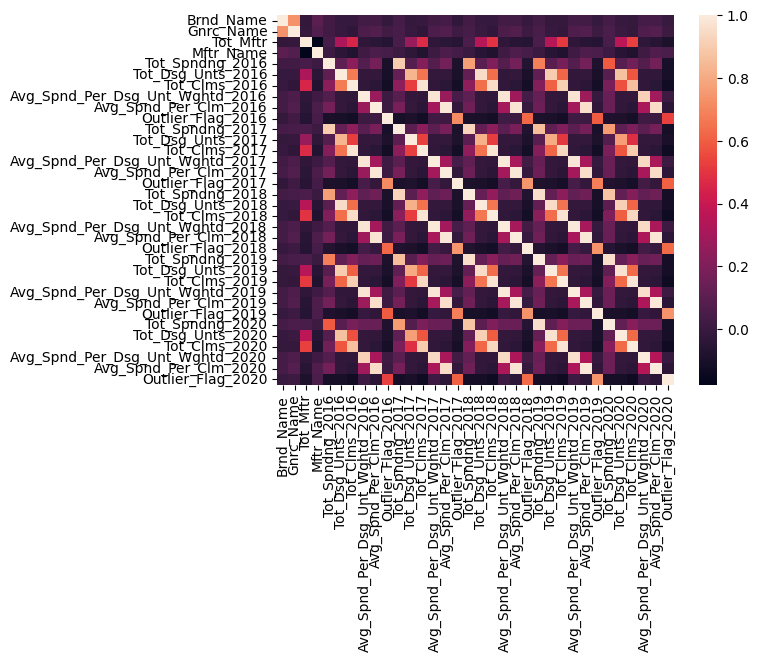

In [20]:
sns.heatmap(corrmatrix, xticklabels=corrmatrix.columns, yticklabels=corrmatrix.columns)

In [75]:
We probably want to split up our correlation matrices year by year. 

In [21]:
d = spendingcopy.iloc[:, 0 : 2]
e = spendingcopy.iloc[:, 3]
c = pd.concat([d, e, spendingcopy.iloc[:,4 : 10]], join='outer', axis=1)
c.head().append(c.tail())

/var/folders/c1/cwj8fw_j3bs0ppnmkfpn4kjw0000gn/T/ipykernel_38830/3486898382.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c.head().append(c.tail())


,Brnd_Name,Gnrc_Name,Mftr_Name,Tot_Spndng_2016,Tot_Dsg_Unts_2016,Tot_Clms_2016,Avg_Spnd_Per_Dsg_Unt_Wghtd_2016,Avg_Spnd_Per_Clm_2016,Outlier_Flag_2016
10,0,0,0,34520.89,2426.26,1189,15.28,29.03,1.0
11,0,0,1,34520.89,2426.26,1189,15.28,29.03,1.0
12,1,1,0,7360772.93,1613893.00,27596,4.56,266.73,0.0
13,1,1,2,2278494.02,504740.00,8520,4.51,267.43,0.0
15,1,1,3,2885686.73,636555.00,10946,4.53,263.63,0.0
15960,2550,1165,64,13004501.55,543593.51,15191,24.09,856.07,0.0
15961,2551,1165,0,79723771.22,3834143.60,102117,21.22,780.71,0.0
15962,2551,1165,501,79723771.22,3834143.60,102117,21.22,780.71,0.0
15963,2552,1664,0,32131449.10,458316.00,4080,70.11,7875.36,0.0
15965,2552,1664,274,32131449.10,458316.00,4080,70.11,7875.36,0.0


In [22]:
c2 = pd. concat([d, e, spendingcopy.iloc[:,10 : 16]], join='outer', axis=1)
c2.head().append(c2.tail())

/var/folders/c1/cwj8fw_j3bs0ppnmkfpn4kjw0000gn/T/ipykernel_38830/3117236594.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c2.head().append(c2.tail())


,Brnd_Name,Gnrc_Name,Mftr_Name,Tot_Spndng_2017,Tot_Dsg_Unts_2017,Tot_Clms_2017,Avg_Spnd_Per_Dsg_Unt_Wghtd_2017,Avg_Spnd_Per_Clm_2017,Outlier_Flag_2017
10,0,0,0,52321.76,903.38,377,126.82,138.78,1.0
11,0,0,1,52321.76,903.38,377,126.82,138.78,1.0
12,1,1,0,4861530.25,1456252.00,22826,3.63,212.98,0.0
13,1,1,2,1389264.75,516468.00,6468,3.47,214.79,0.0
15,1,1,3,1914053.43,512125.00,8851,3.74,216.25,0.0
15960,2550,1165,64,2441949.81,117888.00,3079,20.56,793.10,0.0
15961,2551,1165,0,8068179.93,432153.90,12458,20.48,647.63,0.0
15962,2551,1165,501,8068179.93,432153.90,12458,20.48,647.63,0.0
15963,2552,1664,0,49068876.20,600610.00,5646,85.53,8690.91,0.0
15965,2552,1664,274,44207661.70,569628.00,5082,77.61,8698.87,0.0


In [23]:
c3 = pd.concat([d, e, spendingcopy.iloc[:,16 : 22]], join='outer', axis=1)
c3.head().append(c3.tail())

/var/folders/c1/cwj8fw_j3bs0ppnmkfpn4kjw0000gn/T/ipykernel_38830/3368439283.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c3.head().append(c3.tail())


,Brnd_Name,Gnrc_Name,Mftr_Name,Tot_Spndng_2018,Tot_Dsg_Unts_2018,Tot_Clms_2018,Avg_Spnd_Per_Dsg_Unt_Wghtd_2018,Avg_Spnd_Per_Clm_2018,Outlier_Flag_2018
10,0,0,0,297862.70,233.00,151,915.59,1972.60,1.0
11,0,0,1,297862.70,233.00,151,915.59,1972.60,1.0
12,1,1,0,2999872.44,1869391.00,20102,2.30,149.23,0.0
13,1,1,2,963742.94,866185.00,5674,2.12,169.85,0.0
15,1,1,3,785394.73,336600.00,5899,2.33,133.14,0.0
15960,2550,1165,64,2208171.01,98239.00,2639,22.26,836.75,0.0
15961,2551,1165,0,6721211.74,345316.55,9343,22.88,719.38,1.0
15962,2551,1165,501,6721211.74,345316.55,9343,22.88,719.38,1.0
15963,2552,1664,0,84519375.17,887417.00,9362,105.69,9027.92,0.0
15965,2552,1664,274,56182039.35,707741.00,6218,79.38,9035.39,0.0


In [24]:
c4 = pd.concat([d, e, spendingcopy.iloc[:,22 : 28]], join='outer', axis=1)
c4.head().append(c4.tail())

/var/folders/c1/cwj8fw_j3bs0ppnmkfpn4kjw0000gn/T/ipykernel_38830/2580739861.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c4.head().append(c4.tail())


,Brnd_Name,Gnrc_Name,Mftr_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019,Tot_Clms_2019,Avg_Spnd_Per_Dsg_Unt_Wghtd_2019,Avg_Spnd_Per_Clm_2019,Outlier_Flag_2019
10,0,0,0,362505.76,275.00,179,1675.15,2025.17,1.0
11,0,0,1,362505.76,275.00,179,1675.15,2025.17,1.0
12,1,1,0,2447565.20,1622835.00,15999,2.28,152.98,0.0
13,1,1,2,937622.39,677310.00,5998,2.20,156.32,0.0
15,1,1,3,548107.89,221192.00,3942,2.48,139.04,0.0
15960,2550,1165,64,2018082.12,83418.00,2416,23.20,835.30,0.0
15961,2551,1165,0,6759416.06,295501.76,8879,28.83,761.28,0.0
15962,2551,1165,501,6759416.06,295501.76,8879,28.83,761.28,0.0
15963,2552,1664,0,49624933.74,344872.00,4850,158.55,10231.95,0.0
15965,2552,1664,274,11500653.74,135720.00,1180,84.74,9746.32,0.0


In [25]:
c5 = pd.concat([d, e, spendingcopy.iloc[:,28 : 34]], join='outer', axis=1)
c5.head().append(c5.tail())

/var/folders/c1/cwj8fw_j3bs0ppnmkfpn4kjw0000gn/T/ipykernel_38830/487468057.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c5.head().append(c5.tail())


,Brnd_Name,Gnrc_Name,Mftr_Name,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Tot_Clms_2020,Avg_Spnd_Per_Dsg_Unt_Wghtd_2020,Avg_Spnd_Per_Clm_2020,Outlier_Flag_2020
10,0,0,0,11160.11,132.000,110,81.59,101.46,1
11,0,0,1,11160.11,132.000,110,81.59,101.46,1
12,1,1,0,1668418.74,1324450.294,12600,1.86,132.41,0
13,1,1,2,741734.29,565459.294,5547,1.86,133.72,0
15,1,1,3,326056.77,156219.000,2724,2.09,119.70,0
15960,2550,1165,64,1880206.77,78934.000,2265,22.72,830.11,0
15961,2551,1165,0,5312667.87,249442.750,7207,22.72,737.15,0
15962,2551,1165,501,5312667.87,249442.750,7207,22.72,737.15,0
15963,2552,1664,0,34807960.04,227767.000,3414,162.80,10195.65,0
15965,2552,1664,274,5612603.08,65489.000,620,85.70,9052.59,0


<AxesSubplot:>

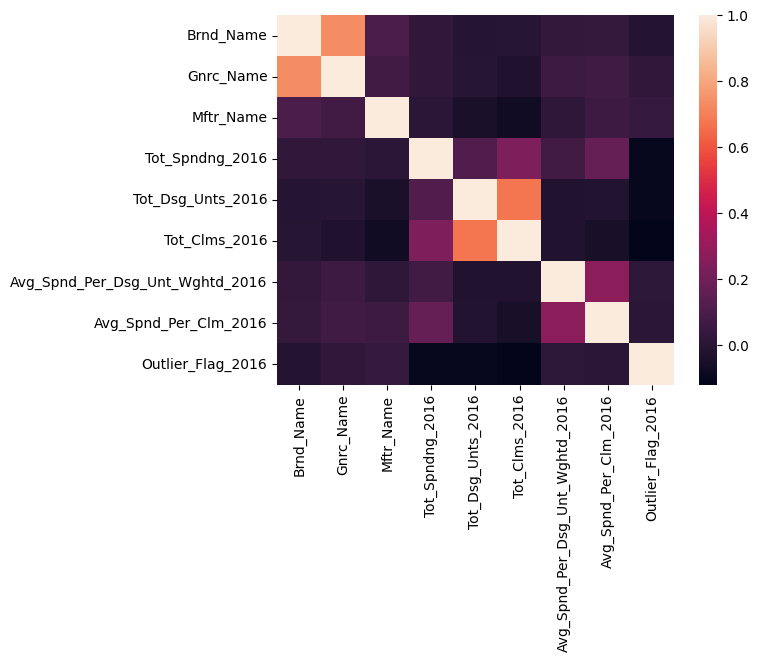

In [26]:
#2016 Heat Map
corrmatrix2016 = c.corr()
sns.heatmap(corrmatrix2016, xticklabels=corrmatrix2016.columns, yticklabels=corrmatrix2016.columns)

<AxesSubplot:>

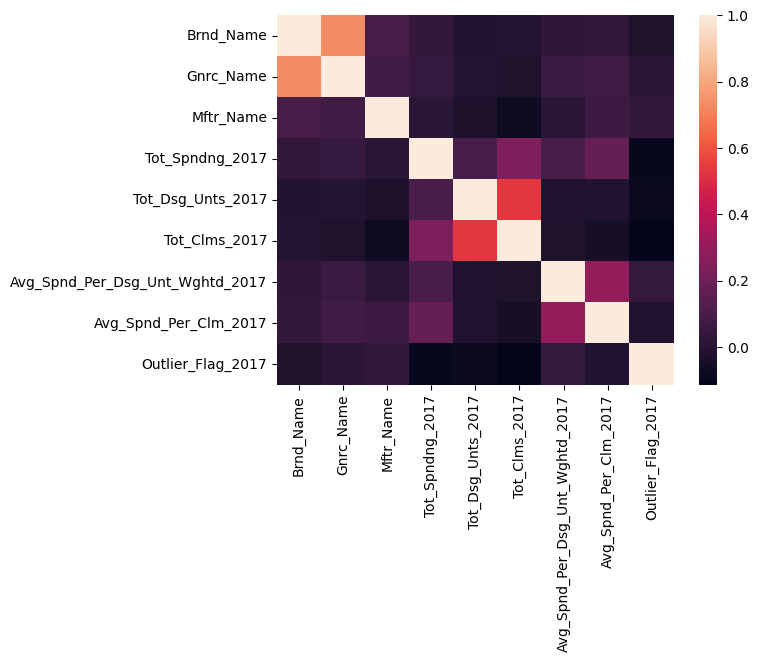

In [27]:
#2017 Heat Map
corrmatrix2017 = c2.corr()
sns.heatmap(corrmatrix2017, xticklabels=corrmatrix2017.columns, yticklabels=corrmatrix2017.columns)

<AxesSubplot:>

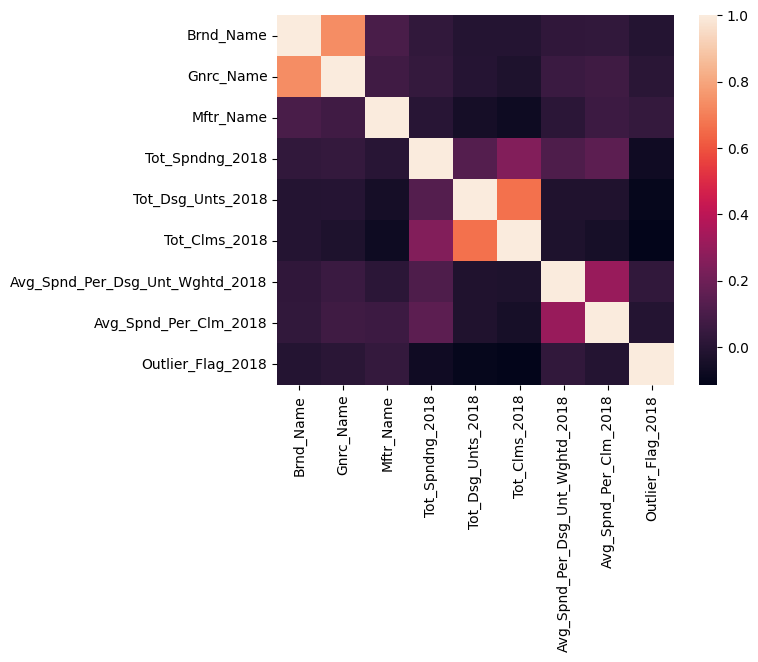

In [28]:
#2018 Heat Map 
corrmatrix2018 = c3.corr()
sns.heatmap(corrmatrix2018, xticklabels=corrmatrix2018.columns, yticklabels=corrmatrix2018.columns)

<AxesSubplot:>

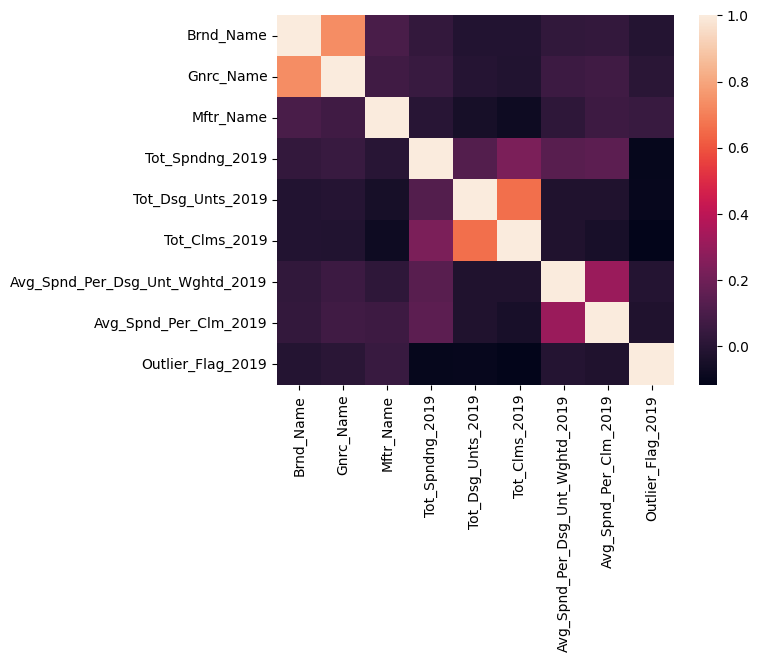

In [29]:
#2019 Heat Map 
corrmatrix2019 = c4.corr()
sns.heatmap(corrmatrix2019, xticklabels=corrmatrix2019.columns, yticklabels=corrmatrix2019.columns)

<AxesSubplot:>

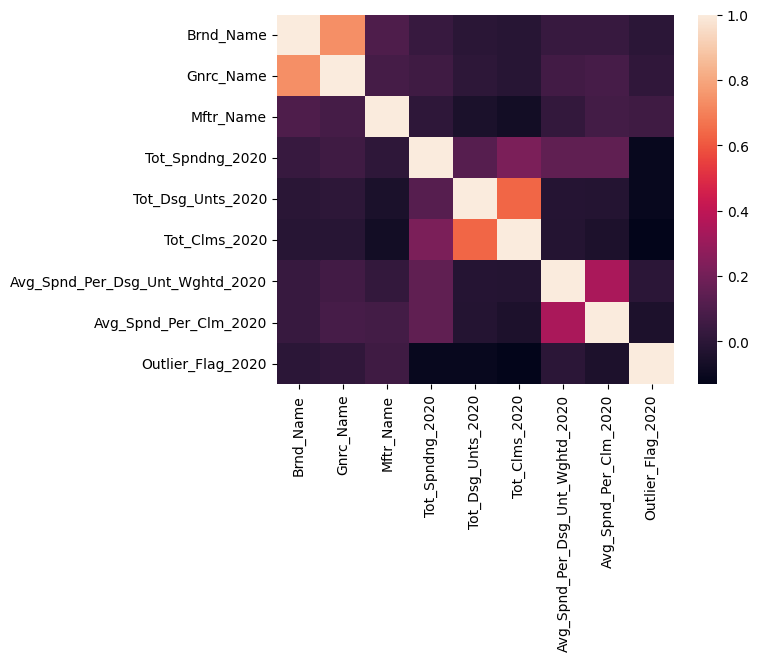

In [30]:
#2020 Heat Map 
corrmatrix2020 = c5.corr()
sns.heatmap(corrmatrix2020, xticklabels=corrmatrix2020.columns, yticklabels=corrmatrix2020.columns)

The number of claims appears to be most closely correlated with total spending, dosage units, and the categories that depend on them. The brand name, generic name, and manufacturer names, on the other hand, are not as closely correlated. The following numerical data supports this claim. 

In [31]:
corrmatrix2016.Tot_Spndng_2016

Brnd_Name                          0.025914
Gnrc_Name                          0.027718
Mftr_Name                          0.007818
Tot_Spndng_2016                    1.000000
Tot_Dsg_Unts_2016                  0.114615
Tot_Clms_2016                      0.235083
Avg_Spnd_Per_Dsg_Unt_Wghtd_2016    0.075021
Avg_Spnd_Per_Clm_2016              0.173875
Outlier_Flag_2016                 -0.099335
Name: Tot_Spndng_2016, dtype: float64

In [32]:
corrmatrix2017.Tot_Spndng_2017

Brnd_Name                          0.036852
Gnrc_Name                          0.044176
Mftr_Name                          0.007730
Tot_Spndng_2017                    1.000000
Tot_Dsg_Unts_2017                  0.100435
Tot_Clms_2017                      0.239129
Avg_Spnd_Per_Dsg_Unt_Wghtd_2017    0.101581
Avg_Spnd_Per_Clm_2017              0.180776
Outlier_Flag_2017                 -0.094032
Name: Tot_Spndng_2017, dtype: float64

In [33]:
corrmatrix2018.Tot_Spndng_2018

Brnd_Name                          0.030411
Gnrc_Name                          0.041851
Mftr_Name                          0.005228
Tot_Spndng_2018                    1.000000
Tot_Dsg_Unts_2018                  0.131378
Tot_Clms_2018                      0.251905
Avg_Spnd_Per_Dsg_Unt_Wghtd_2018    0.114383
Avg_Spnd_Per_Clm_2018              0.152053
Outlier_Flag_2018                 -0.068782
Name: Tot_Spndng_2018, dtype: float64

In [34]:
corrmatrix2019.Tot_Spndng_2019

Brnd_Name                          0.031943
Gnrc_Name                          0.051766
Mftr_Name                          0.005100
Tot_Spndng_2019                    1.000000
Tot_Dsg_Unts_2019                  0.126682
Tot_Clms_2019                      0.235243
Avg_Spnd_Per_Dsg_Unt_Wghtd_2019    0.136663
Avg_Spnd_Per_Clm_2019              0.153884
Outlier_Flag_2019                 -0.100937
Name: Tot_Spndng_2019, dtype: float64

In [35]:
corrmatrix2020.Tot_Spndng_2020

Brnd_Name                          0.035318
Gnrc_Name                          0.056298
Mftr_Name                          0.007083
Tot_Spndng_2020                    1.000000
Tot_Dsg_Unts_2020                  0.120909
Tot_Clms_2020                      0.226269
Avg_Spnd_Per_Dsg_Unt_Wghtd_2020    0.147049
Avg_Spnd_Per_Clm_2020              0.147860
Outlier_Flag_2020                 -0.105827
Name: Tot_Spndng_2020, dtype: float64

Now, we maybe want to visualize which brands are receiving the most money from Medicaid. Let's do this for every year. 

In [98]:
#2016 data 
brand16_df = spendingcopy[['Brnd_Name','Tot_Spndng_2016']].groupby('Brnd_Name').sum().sort_values(by='Tot_Spndng_2016',ascending=False)
brand16_df[''] = pd.qcut(brand16_df['Tot_Spndng_2016'], 2553, labels = False) #cut by quantiles 
print(brand_df.head())

#2017 data 
brand17_df = spendingcopy[['Brnd_Name','Tot_Spndng_2017']].groupby('Brnd_Name').sum().sort_values(by='Tot_Spndng_2017',ascending=False)
brand17_df[''] = pd.qcut(brand17_df['Tot_Spndng_2017'], 2553, labels = False) #cut by quantiles 
print(brand_df.head())

#2018 data 
brand18_df = spendingcopy[['Brnd_Name','Tot_Spndng_2018']].groupby('Brnd_Name').sum().sort_values(by='Tot_Spndng_2018',ascending=False)
brand18_df[''] = pd.qcut(brand18_df['Tot_Spndng_2018'], 2553, labels = False) #cut by quantiles 
print(brand_df.head())

#2019 data 
brand19_df = spendingcopy[['Brnd_Name','Tot_Spndng_2019']].groupby('Brnd_Name').sum().sort_values(by='Tot_Spndng_2019',ascending=False)
brand19_df[''] = pd.qcut(brand19_df['Tot_Spndng_2019'], 2553, labels = False) #cut by quantiles 
print(brand_df.head())

#2020 data 
brand20_df = spendingcopy[['Brnd_Name','Tot_Spndng_2020']].groupby('Brnd_Name').sum().sort_values(by='Tot_Spndng_2020',ascending=False)
brand20_df[''] = pd.qcut(brand20_df['Tot_Spndng_2020'], 2553, labels = False) #cut by quantiles 
print(brand_df.head())

         Brnd_Name  Tot_Spndng_2020      
0           Latuda     2.929706e+09  2552
1  Invega Sustenna     2.261496e+09  2551
2          Vyvanse     2.019120e+09  2550
3         Suboxone     1.710104e+09  2549
4  Lantus Solostar     1.426966e+09  2548
         Brnd_Name  Tot_Spndng_2020      
0           Latuda     2.929706e+09  2552
1  Invega Sustenna     2.261496e+09  2551
2          Vyvanse     2.019120e+09  2550
3         Suboxone     1.710104e+09  2549
4  Lantus Solostar     1.426966e+09  2548
         Brnd_Name  Tot_Spndng_2020      
0           Latuda     2.929706e+09  2552
1  Invega Sustenna     2.261496e+09  2551
2          Vyvanse     2.019120e+09  2550
3         Suboxone     1.710104e+09  2549
4  Lantus Solostar     1.426966e+09  2548
         Brnd_Name  Tot_Spndng_2020      
0           Latuda     2.929706e+09  2552
1  Invega Sustenna     2.261496e+09  2551
2          Vyvanse     2.019120e+09  2550
3         Suboxone     1.710104e+09  2549
4  Lantus Solostar     1.426966e+0

Since integers in the brand name column don't mean much, we will map them back to the original brand name in the brands dictionary. 

In [100]:
#2016 spending 
brand16_df = brand16_df.reset_index()
dict2 = {v : k for k, v in brand_dict.items()}
brand16_df['Brnd_Name'] = brand16_df['Brnd_Name'].replace(dict2)

#2017 spending
brand17_df = brand17_df.reset_index()
brand17_df['Brnd_Name'] = brand17_df['Brnd_Name'].replace(dict2)

#2018 spending
brand18_df = brand18_df.reset_index()
brand18_df['Brnd_Name'] = brand18_df['Brnd_Name'].replace(dict2)

#2019 spending 
brand19_df = brand19_df.reset_index()
brand19_df['Brnd_Name'] = brand19_df['Brnd_Name'].replace(dict2)

#2020 spending 
brand20_df = brand20_df.reset_index()
brand20_df['Brnd_Name'] = brand20_df['Brnd_Name'].replace(dict2)

brand20_df.head()

,Brnd_Name,Tot_Spndng_2020,
0,Latuda,2.929706e+09,2552
1,Invega Sustenna,2.261496e+09,2551
2,Vyvanse,2.019120e+09,2550
3,Suboxone,1.710104e+09,2549
4,Lantus Solostar,1.426966e+09,2548


We now plot the Medicare spending for the top 10 brands in 2016, 2017, 2018, 2019, and 2020. 

In [101]:
brand16_df

,Brnd_Name,Tot_Spndng_2016,
0,Harvoni,4.439243e+09,2552
1,Abilify*,2.150932e+09,2551
2,Humira Pen,1.975350e+09,2550
3,Vyvanse,1.799661e+09,2549
4,Latuda,1.743250e+09,2548
...,...,...,...
2548,Truedraw,1.869600e+02,4
2549,Therapeutic-M,1.339600e+02,3
2550,Multi-Vitamin Daily,4.672000e+01,2
2551,Aspirin EC,4.112000e+01,1


In [102]:
brand16_df = brand16_df.iloc[:10, 0:2]
brand16_df['Tot_Spndng_2016'] = brand16_df['Tot_Spndng_2016'].astype(int)

brand17_df = brand17_df.iloc[:10, 0:2]
brand17_df['Tot_Spndng_2017'] = brand17_df['Tot_Spndng_2017'].astype(int)

brand18_df = brand18_df.iloc[:10, 0:2]
brand18_df['Tot_Spndng_2018'] = brand18_df['Tot_Spndng_2018'].astype(int)

brand19_df = brand19_df.iloc[:10, 0:2]
brand19_df['Tot_Spndng_2019'] = brand19_df['Tot_Spndng_2019'].astype(int)

brand20_df = brand20_df.iloc[:10, 0:2]
brand20_df['Tot_Spndng_2020'] = brand20_df['Tot_Spndng_2020'].astype(int)
brand20_df

,Brnd_Name,Tot_Spndng_2020
0,Latuda,2929705870
1,Invega Sustenna,2261495774
2,Vyvanse,2019119968
3,Suboxone,1710104222
4,Lantus Solostar,1426965791
5,Stelara*,1379985365
6,Flovent HFA,1374083878
7,Basaglar Kwikpen U-100,1214848584
8,Trulicity,1132337161
9,Januvia,1112078695


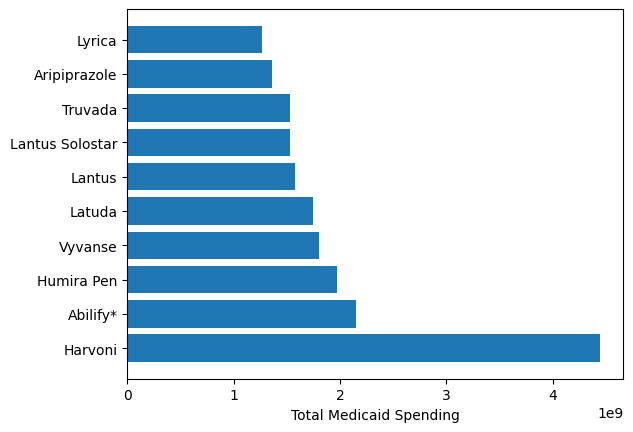

In [137]:
p1 = plt.barh(width='Tot_Spndng_2016', y='Brnd_Name', data=brand16_df.iloc[:, 0:3])
plt.xlabel('Total Medicaid Spending')
plt.show()

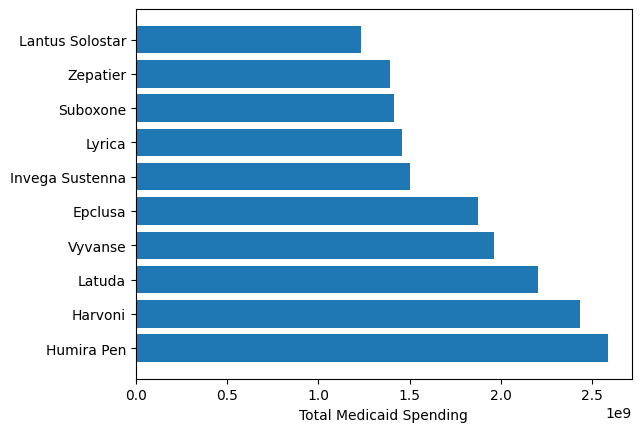

In [136]:
p17 = plt.barh(width='Tot_Spndng_2017', y='Brnd_Name', data=brand17_df.iloc[:, 0:3])
plt.xlabel('Total Medicaid Spending')
plt.show()

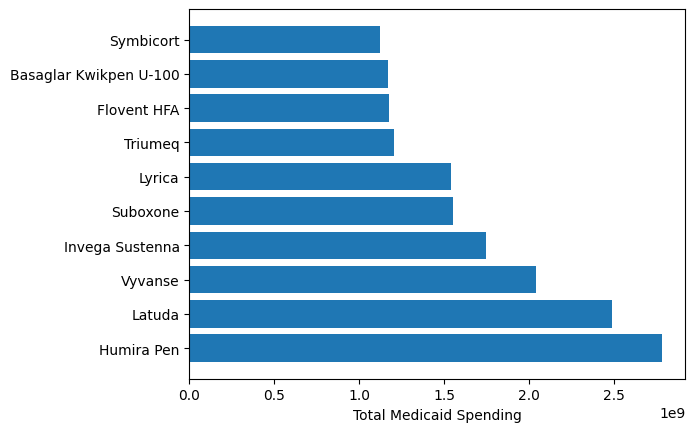

In [133]:
p18 = plt.barh(width='Tot_Spndng_2018', y='Brnd_Name', data=brand18_df.iloc[:, 0:3])
plt.xlabel('Total Medicaid Spending')
plt.show()

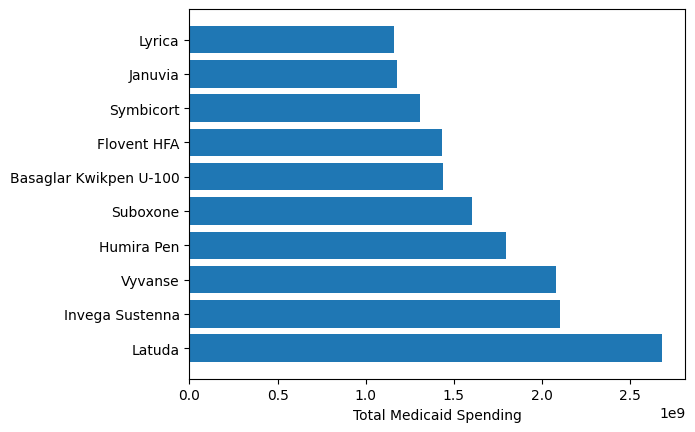

In [134]:
p19 = plt.barh(width='Tot_Spndng_2019', y='Brnd_Name', data=brand19_df.iloc[:, 0:3])
plt.xlabel('Total Medicaid Spending')
plt.show()

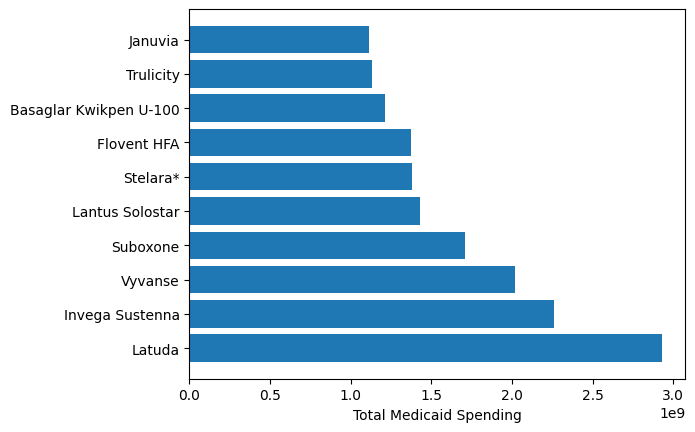

In [138]:
p20 = plt.barh(width='Tot_Spndng_2020', y='Brnd_Name', data=brand20_df.iloc[:, 0:3])
plt.xlabel('Total Medicaid Spending')
plt.show()